# Practice notebook for regression analysis with NHANES

This notebook will give you the opportunity to perform some
regression analyses with the NHANES data that are similar to
the analyses done in the week 2 case study notebook.

You can enter your code into the cells that say "enter your code here",
and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar
to code that appears in the case study notebook.  You will need
to edit code from that notebook in small ways to adapt it to the
prompts below.

To get started, we will use the same module imports and
read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)

# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
da = da[vars].dropna()

## Question 1:

Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [2]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR",data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.720
Date:                Mon, 12 Apr 2021   Prob (F-statistic):             0.0991
Time:                        17:23:54   Log-Likelihood:                -17149.
No. Observations:                5102   AIC:                         3.430e+04
Df Residuals:                    5100   BIC:                         3.432e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0564      0.290    100.143      0.000      28.488      29.625
RIDAGEYR       0.0091      0.006      1.649      0.099      -0.002       0.020
==============================================================================
Omnibus:                      936.202   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1857.656
Skew:                           1.105   Prob(JB):                         0.00
Kurtosis:                       4.964   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q1a.__ According to your fitted model, do older people tend to have higher or lower BMI than younger people?
 - higher

__Q1b.__ Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?
- No

__Q1c.__ By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?
- 0.182 (0.0091*20)

__Q1d.__ What fraction of the variation of BMI in this population is explained by age?
- 0.001

## Question 2: 

Add gender and ethnicity as additional control variables to your linear model relating BMI to age.  You will need to recode the ethnic groups based
on the values in the codebook entry for [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [4]:
# Create a labeled version of the gender variable
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
# Create a labeled version of the ethnic variable
da["RIDRETH1x"] = da.RIDRETH1.replace({1:"Mexican American",2:"Other Hispanic",3:"Non-Hispanic White",4:"Non-Hispanic Black",5:"Other Race - Including Multi-Racial"})

In [8]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x",data=da)
result = model.fit()
result.summary()
 # or 
#     model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + C(RIDRETH1)",data=da)
# result = model.fit()
# result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     49.27
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           3.98e-59
Time:                        17:31:45   Log-Likelihood:                -17007.
No. Observations:                5102   AIC:                         3.403e+04
Df Residuals:                    5095   BIC:                         3.407e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           31.2361      0.355     87.891      0.000      30.539      31.933
RIAGENDRx[T.Male]                                   -1.0226      0.190     -5.370      0.000      -1.396      -0.649
RIDRETH1x[T.Non-Hispanic Black]                     -0.4499      0.308     -1.460      0.144      -1.054       0.154
RIDRETH1x[T.Non-Hispanic White]                     -1.8555      0.282     -6.588      0.000      -2.408      -1.303
RIDRETH1x[T.Other Hispanic]                         -0.9379      0.345     -2.721      0.007      -1.614      -0.262
RIDRETH1x[T.Other Race - Including Multi-Racial]    -4.7799      0.334    -14.318      0.000      -5.434      -4.125
RIDAGEYR                                             0.0065      0.005      1.196      0.232      -0.004       0.017
==============================================================================
Omnibus:                      917.090   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1855.286
Skew:                           1.075   Prob(JB):                         0.00
Kurtosis:                       5.026   Cond. No.                         308.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q2a.__ How did the mean relationship between BMI and age change when you added additional covariates to the model?
 - It decreased

__Q2b.__ How did the standard error for the regression parameter for age change when you added additional covariates to the model?
- It decreased

__Q2c.__ How much additional variation in BMI is explained by age, gender, and ethnicity that is not explained by age alone?
 - 0.055-0.001 = 0.054

__Q2d.__ What reference level did the software select for the ethnicity variable?
 - Mexican American

__Q2e.__ What is the expected difference between the BMI of a 40 year-old non-Hispanic black man and a 30 year-old non-Hispanic black man?
- (-0.4499*10) = -4.499

__Q2f.__ What is the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic black man?
- (-1.0226+-0.4499) = -1.4725


## Question 3: 

Randomly sample 25% of the NHANES data, then fit the same model you used in question 2 to this data set.

In [21]:
da_25 = da.sample(frac=0.25)
print(da.head())
da_25.shape

   BPXSY1  RIDAGEYR  RIAGENDR  RIDRETH1  DMDEDUC2  BMXBMI  SMQ020 RIAGENDRx  \
0   128.0        62         1         3       5.0    27.8       1      Male   
1   146.0        53         1         3       3.0    30.8       1      Male   
2   138.0        78         1         3       3.0    28.8       1      Male   
3   132.0        56         2         3       5.0    42.4       2    Female   
4   100.0        42         2         4       4.0    20.3       2    Female   

            RIDRETH1x  
0  Non-Hispanic White  
1  Non-Hispanic White  
2  Non-Hispanic White  
3  Non-Hispanic White  
4  Non-Hispanic Black  


(1276, 9)

In [22]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x",data=da_25)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     16.12
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           6.06e-18
Time:                        23:24:09   Log-Likelihood:                -4198.9
No. Observations:                1276   AIC:                             8412.
Df Residuals:                    1269   BIC:                             8448.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           31.7051      0.679     46.675      0.000      30.372      33.038
RIAGENDRx[T.Male]                                   -1.4219      0.366     -3.881      0.000      -2.141      -0.703
RIDRETH1x[T.Non-Hispanic Black]                     -0.6515      0.589     -1.107      0.269      -1.807       0.503
RIDRETH1x[T.Non-Hispanic White]                     -1.5492      0.537     -2.885      0.004      -2.603      -0.496
RIDRETH1x[T.Other Hispanic]                         -0.9055      0.634     -1.427      0.154      -2.150       0.339
RIDRETH1x[T.Other Race - Including Multi-Racial]    -5.0587      0.633     -7.992      0.000      -6.300      -3.817
RIDAGEYR                                             0.0038      0.010      0.362      0.718      -0.017       0.024
==============================================================================
Omnibus:                      219.638   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              447.451
Skew:                           1.002   Prob(JB):                     6.87e-98
Kurtosis:                       5.098   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q3a.__ How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

- All of the estimated regression coefficients decreased, while intercept increased.
- The std errors Increased.

## Question 4:

Generate a scatterplot of the residuals against the fitted values for the model you fit in question 2.


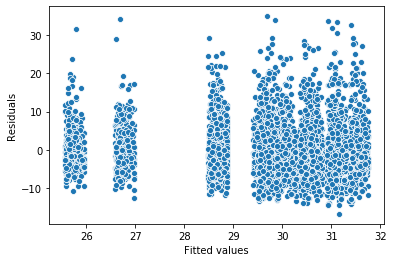

In [26]:
pp = sns.scatterplot(result.fittedvalues, result.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")

In [29]:
da.BMXBMI.mean()
da.columns

Index(['BPXSY1', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1', 'DMDEDUC2', 'BMXBMI',
       'SMQ020', 'RIAGENDRx', 'RIDRETH1x'],
      dtype='object')

__Q4a.__ What mean/variance relationship do you see?
- It appears that we have a modestly increasing mean/variance relationship.

## Question 5: 

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% simultaneous confidence band on your graph.

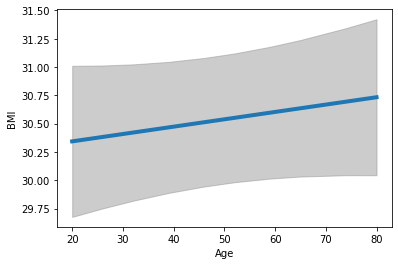

In [36]:
from statsmodels.sandbox.predict_functional import predict_functional

# Fix certain variables at reference values.  Not all of these
# variables are used here, but we provide them with a value anyway
# to prevent a warning message from appearing.
values = {"RIAGENDRx": "Male", "RIAGENDR": 1,'BPXSY1':1,"RIDRETH1x": "Mexican American",
          "DMDEDUC2": 1, "RIDRETH1": 1, "SMQ020": 1}

# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr, cb, fv = predict_functional(result, "RIDAGEYR",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

__Q5a.__ According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  *Hint:* What is the longest horizontal line starting at age 30 that remains within the confidence band?

- 35

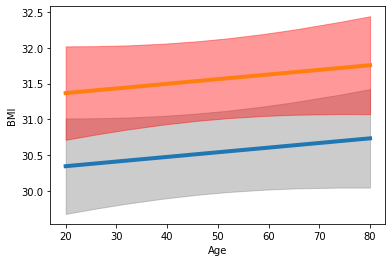

In [43]:
from statsmodels.sandbox.predict_functional import predict_functional



ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")







values_f = {"RIAGENDRx": "Female", "RIAGENDR": 2,'BPXSY1':1,"RIDRETH1x": "Mexican American",
          "DMDEDUC2": 1, "RIDRETH1": 1, "SMQ020": 1}

pr_f, cb_f, fv_f = predict_functional(result, "RIDAGEYR",
                values=values_f, ci_method="simultaneous")

ax = sns.lineplot(fv_f, pr_f, lw=4)
ax.fill_between(fv_f, cb_f[:, 0], cb_f[:, 1], color='red', alpha=0.4)